# Customer subscriptions analytics

We want to target customers who are likely to subscriibe to the app

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

dataset =pd.read_csv('./customer_app_data/appdata10.csv')

In [30]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [31]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
dataset['hour']=dataset.hour.str.slice(1,3).astype(int)

In [33]:
dataset2 = dataset.copy().drop(columns = ['user','screen_list','enrolled_date','first_open','enrolled'])

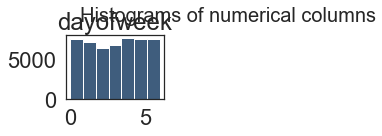

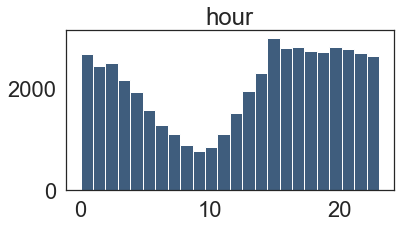

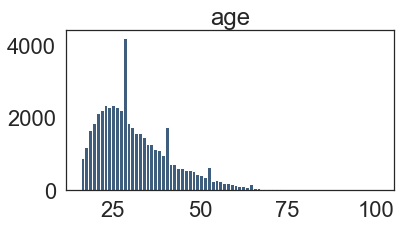

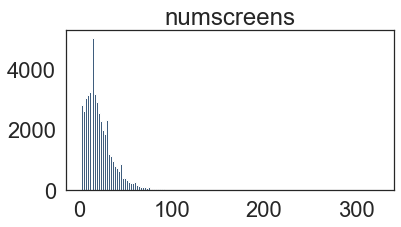

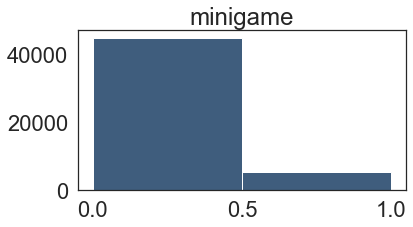

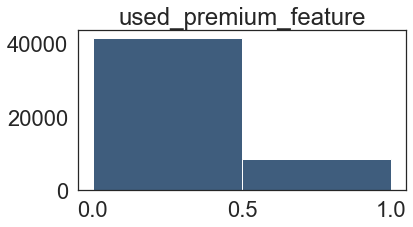

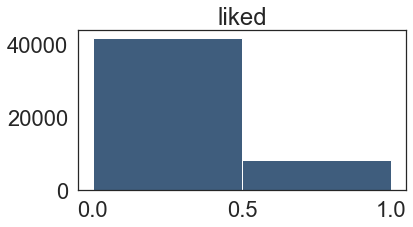

<Figure size 1440x720 with 0 Axes>

In [34]:
plt.suptitle('Histograms of numerical columns', fontsize=20)
for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(dataset2.columns.values[i-1])
    
    vals=np.size(dataset2.iloc[:,i-1].unique())
    
    plt.hist(dataset2.iloc[:,i-1],bins=vals,color='#3F5D7D')
    plt.figure(figsize=(20,10))

<AxesSubplot:title={'center':'Correlation with responose variable'}>

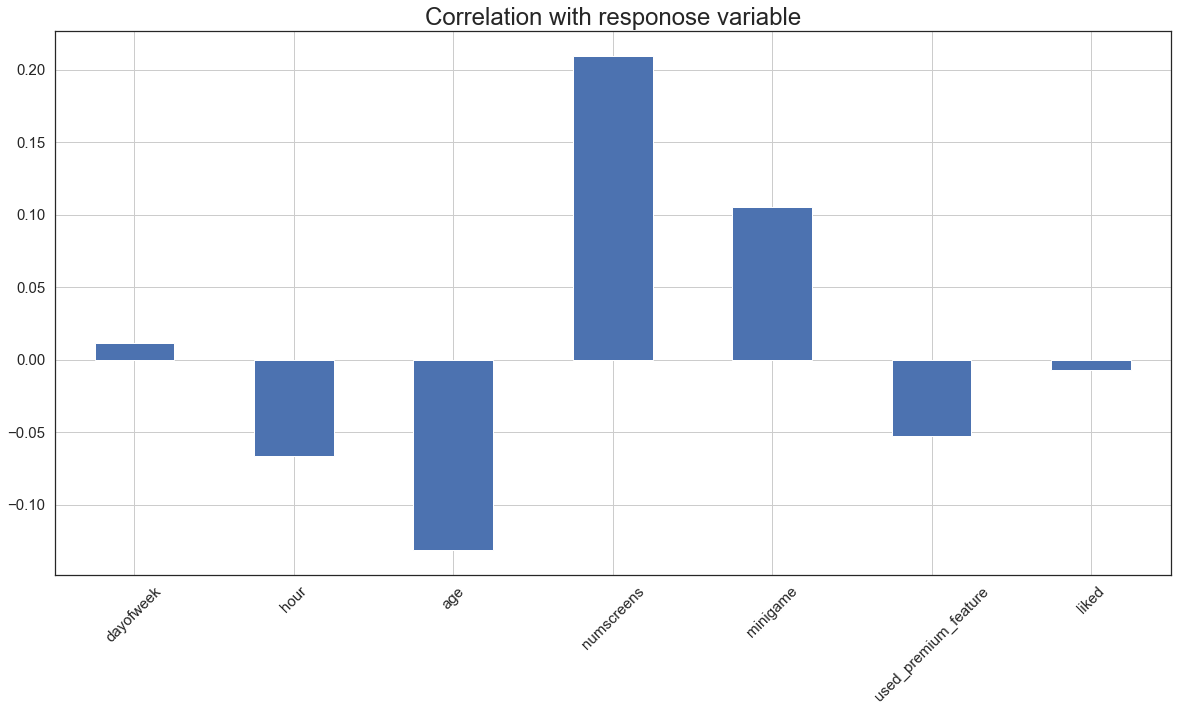

In [35]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),
                                            title='Correlation with responose variable',
                                            fontsize=15, rot=45,
                                            grid=True)

<AxesSubplot:>

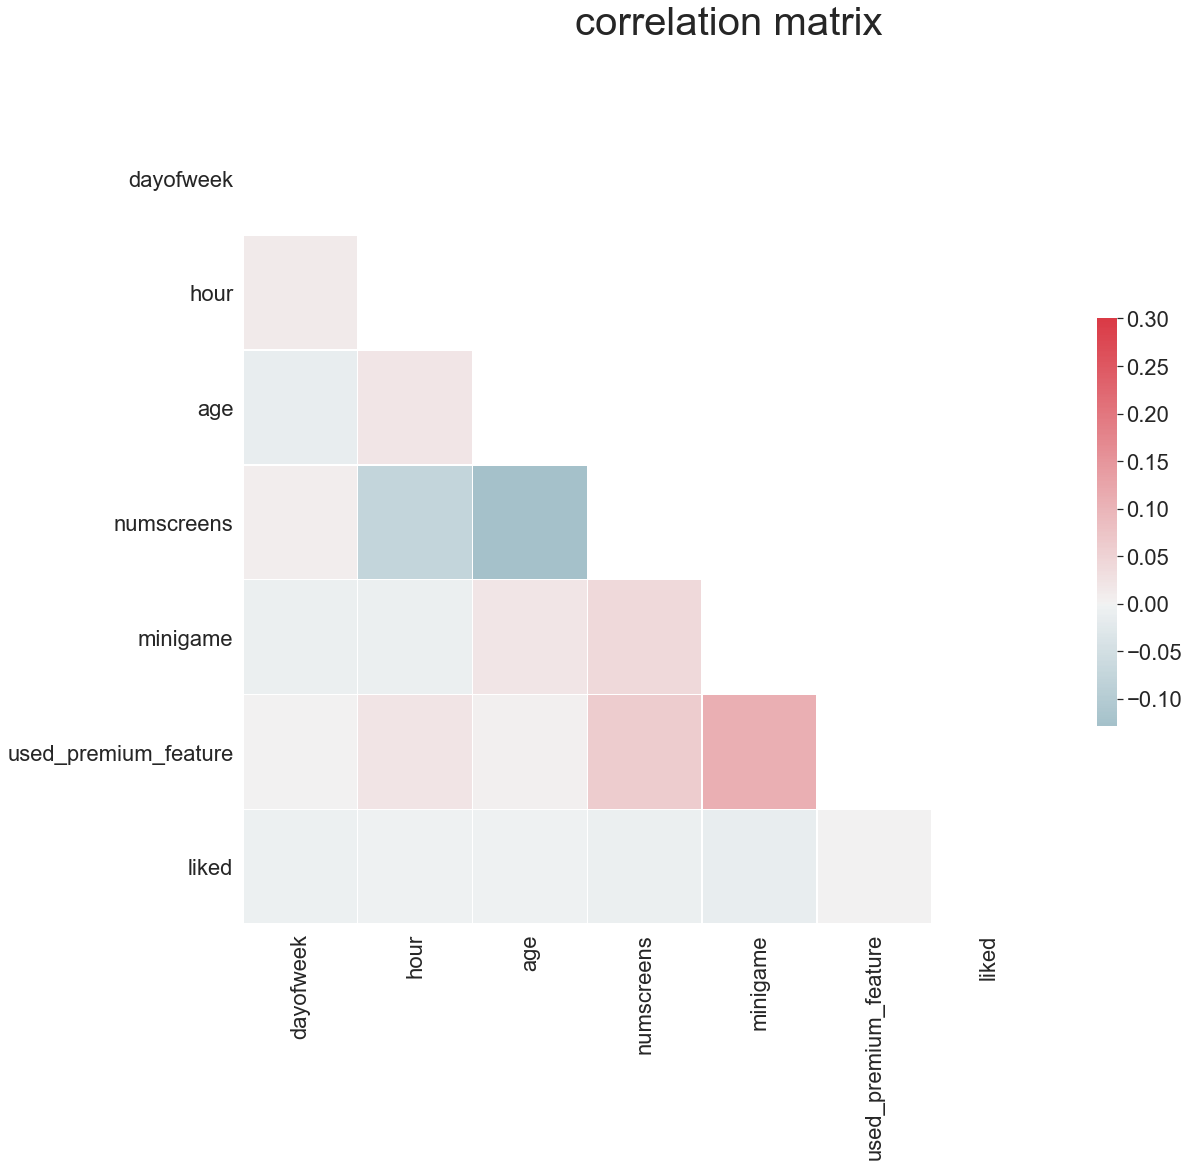

In [36]:
sns.set(style="white", font_scale=2)
corr=dataset2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(18,15))
f.suptitle("correlation matrix", fontsize=40)
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
          square =True, linewidths=.5, cbar_kws={"shrink":.5})

In [37]:
print(dataset.dtypes)
dataset["first_open"]=[parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["enrolled_date"]=[parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset["enrolled_date"]]
print(dataset.dtypes)

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object
user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object


In [38]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')
print(dataset["difference"])

0        NaN
1        NaN
2        NaN
3        0.0
4        0.0
        ... 
49995    0.0
49996    NaN
49997    NaN
49998    0.0
49999    NaN
Name: difference, Length: 50000, dtype: float64


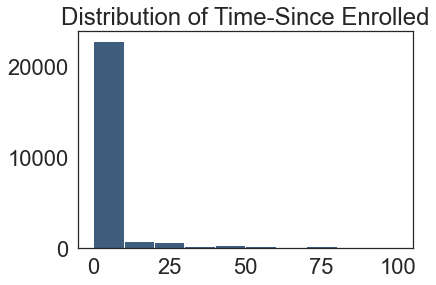

In [41]:
plt.hist(dataset["difference"].dropna(), color="#3F5D7D", range=[0,100])
plt.title('Distribution of Time-Since Enrolled')
plt.show()

In [42]:
#restricting to 2 days (48 hrs) after inferring from above plot
dataset.loc[dataset.difference>48, 'enrolled']=0
dataset = dataset.drop(columns=['difference','first_open','enrolled_date'])

In [44]:
top_screens = pd.read_csv('./customer_app_data/top_screens.csv').top_screens.values

In [47]:
print(top_screens)

['Loan2' 'location' 'Institutions' 'Credit3Container' 'VerifyPhone'
 'BankVerification' 'VerifyDateOfBirth' 'ProfilePage' 'VerifyCountry'
 'Cycle' 'idscreen' 'Credit3Dashboard' 'Loan3' 'CC1Category' 'Splash'
 'Loan' 'CC1' 'RewardsContainer' 'Credit3' 'Credit1' 'EditProfile'
 'Credit2' 'Finances' 'CC3' 'Saving9' 'Saving1' 'Alerts' 'Saving8'
 'Saving10' 'Leaderboard' 'Saving4' 'VerifyMobile' 'VerifyHousing'
 'RewardDetail' 'VerifyHousingAmount' 'ProfileMaritalStatus'
 'ProfileChildren ' 'ProfileEducation' 'Saving7' 'ProfileEducationMajor'
 'Rewards' 'AccountView' 'VerifyAnnualIncome' 'VerifyIncomeType' 'Saving2'
 'Saving6' 'Saving2Amount' 'Saving5' 'ProfileJobTitle' 'Login'
 'ProfileEmploymentLength' 'WebView' 'SecurityModal' 'Loan4' 'ResendToken'
 'TransactionList' 'NetworkFailure' 'ListPicker']


In [50]:
dataset['screen_list']=dataset.screen_list.astype(str)+','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+",","")

In [51]:
#leftover screens
dataset["Other"] = dataset.screen_list.str.count(",")
dataset=dataset.drop(columns=["screen_list"])

In [52]:
#Funnels
#Grouping correlated screens

savings_screens = [
    "Saving1",
    "Saving2",
    "Saving2Amount",
    "Saving4",
    "Saving5",
    "Saving6",
    "Saving7",
    "Saving8",
    "Saving9",
    "Saving10"
]

dataset["SavingsCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)

cm_screens = [
    "Credit1",
    "Credit2",
    "Credit3",
    "Credit3Container",
    "Credit3Dashboard"
]

dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = [
    "CC1",
    "CC1Category",
    "CC3"
]

dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = [
    "Loan",
    "Loan2",
    "Loan3",
    "Loan4"
]

dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [53]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,7,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,2,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,8,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,12,0,2,0,1


In [54]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingsCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [144]:
dataset.to_csv("./customer_app_data/new_appdata10.csv",index=False)
#Creating a copy of clean data
dataset=pd.read_csv("./customer_app_data/new_appdata10.csv")

In [145]:
response = dataset["enrolled"]

In [146]:
dataset.drop(columns='enrolled')

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,1
1,333588,6,1,24,13,0,0,0,1,1,...,0,0,0,0,0,7,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,2,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,8,0,3,0,1
4,51549,1,18,31,32,0,0,1,0,1,...,0,0,0,0,0,12,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0,0,...,0,0,0,0,0,8,0,2,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,3,0,0,0,0
49997,302367,2,22,39,25,0,0,0,1,0,...,0,0,0,0,0,8,0,0,0,0
49998,324905,6,12,27,26,0,0,0,1,0,...,0,0,0,0,0,15,0,0,0,0


In [147]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset,response,test_size=0.2,random_state=0)

In [148]:
train_identifier = X_train['user']
X_train = X_train.drop(columns='user')
test_identifier = X_test['user']
X_test = X_test.drop(columns='user')

In [149]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train2 = pd.DataFrame(sc_x.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_x.fit_transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [150]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=3, penalty='l2')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [151]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [152]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[5072    0]
 [   0 4928]]


In [153]:
print(accuracy_score(y_test,y_pred))

1.0


In [154]:
print(precision_score(y_test,y_pred))

1.0


In [155]:
print(recall_score(y_test,y_pred))

1.0


In [156]:
print(f1_score(y_test,y_pred))

1.0


<AxesSubplot:>

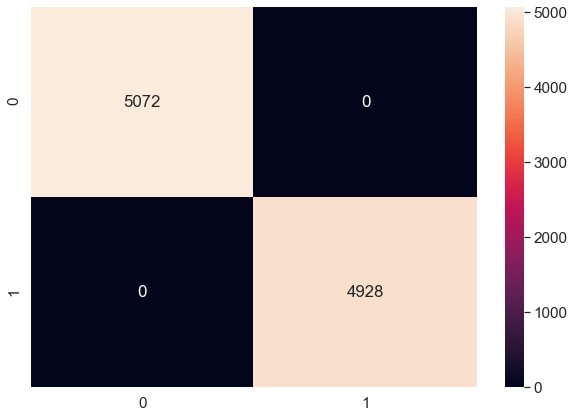

In [157]:
df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

In [158]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std()))

Logistic Accuracy: 1.000 (+/- 0.000)


In [159]:
final_results = pd.concat([y_test,test_identifier], axis=1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop=True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,1
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
